# DogeCoin X ElonMusk Analysis

In [3]:
import pandas as pd
from IPython.display import display
import os
import json
import numpy as np
from datetime import datetime
import re
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data

In [4]:
data = pd.read_csv('C:/Users/student/Desktop/tweets.csv',nrows=50,  dtype=pd.StringDtype())
df = pd.DataFrame(data)
df.head()


,[],Fri May 14 00:50:44 +0000 2021,@martypartymusic @elonmusk This is embarrassingly dumb,Ben Wagstaff
0,['DOGECOIN'],Fri May 14 00:50:45 +0000 2021,RT @MattWallace888: @elonmusk #DOGECOIN IS THE...,Jared Lozano
1,[],Fri May 14 00:50:45 +0000 2021,RT @SPE_Token_BSC: @elonmusk $SPE is capturing...,Fraaaaaa
2,[],Fri May 14 00:50:45 +0000 2021,@alexkehr @elonmusk Once they are able to remo...,EIoṉ̲ Muʂⱪ ̲̲ .................▶ ᅠ
3,[],Fri May 14 00:50:45 +0000 2021,@StockNick1 @VirginiaTrueman @ClairvoyantINVT ...,Fly By Night
4,[],Fri May 14 00:50:45 +0000 2021,@CrytoArt @KevinSvenson_ @elonmusk You know Do...,Fearismynam.eth


In [5]:
pd.set_option('display.max_columns', None) # This will make it so all columns appear when printing
pd.options.display.max_colwidth = 300  # This makes it so we can see the entire tweet text.
pd.set_option('display.max_rows', 1000)
print(df.head())

             []  Fri May 14 00:50:44 +0000 2021  \
0  ['DOGECOIN']  Fri May 14 00:50:45 +0000 2021   
1            []  Fri May 14 00:50:45 +0000 2021   
2            []  Fri May 14 00:50:45 +0000 2021   
3            []  Fri May 14 00:50:45 +0000 2021   
4            []  Fri May 14 00:50:45 +0000 2021   

                                                                                         @martypartymusic @elonmusk This is embarrassingly dumb  \
0                                                              RT @MattWallace888: @elonmusk #DOGECOIN IS THE FUTURE CRYPTOCURRENCY OF EARTH!!!   
1   RT @SPE_Token_BSC: @elonmusk $SPE is capturing and storing Carbon for our "Certified CO2 Reductions" (CCR) Vault.  We will then make these…   
2  @alexkehr @elonmusk Once they are able to remove all uncertainty around XRP, it’ll provide the market another green… https://t.co/JYycD6Sm90   
3  @StockNick1 @VirginiaTrueman @ClairvoyantINVT @elonmusk @JeffBezos @BillGates You obviously weren’t pa

In [6]:
import re


# Scrub/Clean tweet text
df['TweetTextCleaned'] = df['@martypartymusic @elonmusk This is embarrassingly dumb'].map(lambda x: re.sub('[,\.!?]', '', x)) # remove punctuation
df['TweetTextCleaned'] = df['TweetTextCleaned'].map(lambda x: x.lower()) # convert the titles to lowercase
df['TweetTextCleaned'] = df['TweetTextCleaned'].map(lambda x: re.sub("@[A-Za-z0-9]+","", x))
df['TweetTextCleaned'] = df['TweetTextCleaned'].map(lambda x: re.sub(":", " ", x))
df['TweetTextCleaned'] = df['TweetTextCleaned'].map(lambda x: re.sub("rt", " ", x))
df['TweetTextCleaned'] = df['TweetTextCleaned'].map(lambda x: re.sub("https", " ", x))

# remove some other stuff that seems like nonsense
df['TweetTextCleaned'] = df['TweetTextCleaned'].map(lambda x: re.sub("tco", " ", x))
df['TweetTextCleaned'] = df['TweetTextCleaned'].map(lambda x: re.sub("amp", "", x))
#df['text'] = df['text'].apply(lambda x: x.split())




# might need to figure out how to escape the backslash as a special character - there's some random \u2066, \u2066 records in here

In [7]:
df['TweetTextCleaned'] = df['TweetTextCleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

## Visualizations of Most Common Words

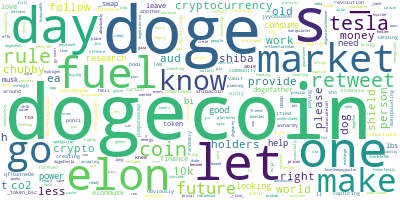

In [8]:
long_string = ','.join (list(df['TweetTextCleaned'].values))
wordcloud = WordCloud(background_color = 'white', max_words = 5000,contour_width = 3, contour_color = 'blue' )
wordcloud.generate(long_string)
wordcloud.to_image()

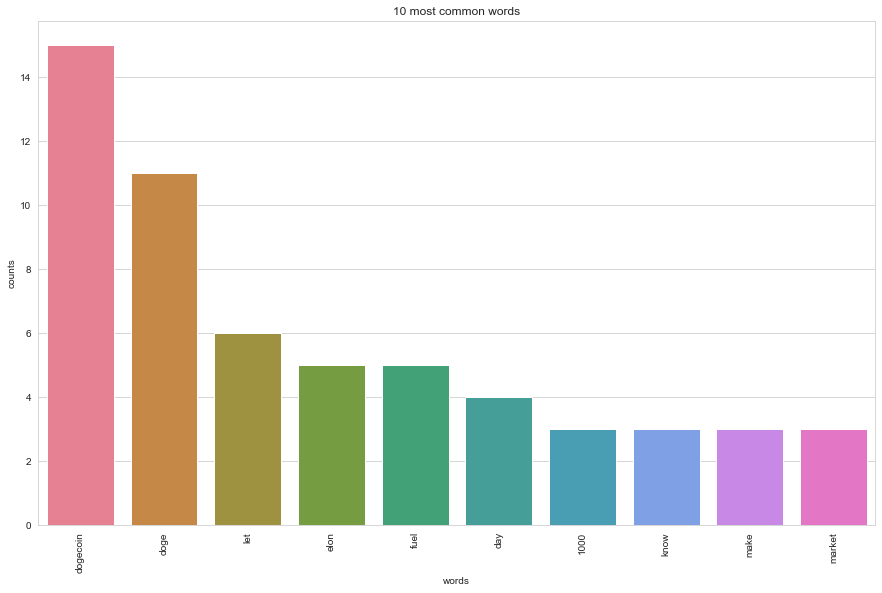

--- 0.7681896686553955 seconds ---


In [9]:

import time
start_time = time.time()

sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['TweetTextCleaned'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

print("--- %s seconds ---" % (time.time() - start_time))


## Topics Visualization

In [10]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 10
number_words = 15
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)


Topics found via LDA:

Topic #0:
know world place genocide gaza better gonna say wanted deep revolution reset dog works knee

Topic #1:
rule dogecoin market need upa3gsijip dude people probab coz understand gave markets manipulates ainty remove

Topic #2:
dogecoin ea cryptocurrency future tesla make asharmy community shibacoin sending awesome 20000000 randomly corinthians veetgz9jul

Topic #3:
looking right bololex man polonidex posted reach dpc said satoexc dappcents trade dyor _lsd_crypto fossil

Topic #4:
doge token bi market research coin money love presale exchange available miss event goose hk4x5o2oay

Topic #5:
doge elon let __finance dogecoin crypto elonmusk leave _swap help month btc think buy cocoswap

Topic #6:
tesla make spe vault ified storing ce ccr carbon capturing reductions _token_bsc transparent shrugging sho

Topic #7:
day 1000 retweet aud person old holders shield days follow shiba chubby 10k dogecoin true

Topic #8:
fuel 3200 lbs let good co2 innovative gas costs e

In [11]:
def getTextAnalysis9(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Netruel"
    else:
        return "Postive"

In [28]:
long_string = ','.join (list(df['TweetTextCleaned'].values))
a = long_string
getTextAnalysis9(a)

TypeError: '<' not supported between instances of 'str' and 'int'

In [14]:
df.describe()

,[],Fri May 14 00:50:44 +0000 2021,@martypartymusic @elonmusk This is embarrassingly dumb,Ben Wagstaff,TweetTextCleaned
count,50,50,50,50,50
unique,23,7,48,50,48
top,[],Fri May 14 00:50:47 +0000 2021,RT @MattWallace888: @elonmusk #DOGECOIN IS THE FUTURE CRYPTOCURRENCY OF EARTH!!!,Juan Restrepog,$1000 one person 7 days retweet &; follow -chubby shiba 10k holders -only one day old -shield aud…
freq,25,10,2,1,2


In [ ]:
df.max(axis=0,numeric_only= True)

## Sentiment Analysis

In [23]:

from textblob import TextBlob

long_string = ','.join (list(df['TweetTextCleaned'].values))
blob = TextBlob(long_string)
blob.tags


[('dogecoin', 'JJ'),
 ('future', 'JJ'),
 ('cryptocurrency', 'NN'),
 ('ea', 'NN'),
 ('h', 'NN'),
 ('_token_bsc', 'NNP'),
 ('spe', 'JJ'),
 ('capturing', 'VBG'),
 ('storing', 'VBG'),
 ('carbon', 'NN'),
 ('ce', 'JJ'),
 ('ified', 'JJ'),
 ('co2', 'NN'),
 ('reductions', 'NNS'),
 ('ccr', 'NN'),
 ('vault', 'NN'),
 ('make', 'VBP'),
 ('these…', 'NN'),
 ('able', 'JJ'),
 ('remove', 'NN'),
 ('unce', 'NN'),
 ('ainty', 'NN'),
 ('around', 'IN'),
 ('xrp', 'IN'),
 ('it', 'PRP'),
 ('’', 'VBZ'),
 ('ll', 'JJ'),
 ('provide', 'NN'),
 ('market', 'NN'),
 ('another', 'DT'),
 ('green…', 'NN'),
 ('//', 'NN'),
 ('/jyycd6sm90', 'NNP'),
 ('obviously', 'RB'),
 ('weren', 'JJ'),
 ('’', 'NNP'),
 ('t', 'NN'),
 ('paying', 'VBG'),
 ('attentio…', 'JJ'),
 ('//', 'NNP'),
 ('/oudl4acpuk', 'NNP'),
 ('_', 'NNP'),
 ('know', 'VBP'),
 ('doge', 'VBZ'),
 ('creating', 'VBG'),
 ('14m', 'CD'),
 ('coins', 'NNS'),
 ('per', 'IN'),
 ('day', 'NN'),
 ('forever', 'RB'),
 ('right', 'RB'),
 ('means', 'VBZ'),
 ('ne…', 'JJ'),
 ('//', 'NNP'),
 ('/nk

In [18]:
def sentimentAnalysis(s):
        from textblob import TextBlob
        analysis = TextBlob(s)
        return analysis.sentiment[0] 

In [19]:
long_string = ','.join (list(df['TweetTextCleaned'].values))

sentimentAnalysis(long_string)

0.21718684541265185

In [22]:

def get_sentiment_analysis(text, coins):
#Return the sentiment analysis of coins mentioned in text in
#the form of a dictionary that aggregates the sentiment of
#sentences that include each of the coins.
 
    
    sentiment = {}
    blob = TextBlob(text)
    for sentence in blob.sentences:
        lowercase_words = [x.lower() for x in sentence.words]
        for coin in coins:
            if coins[0].lower() in lowercase_words or coins[1].lower() in lowercase_words:
                try:
                    sentiment[coins] += sentence.sentiment.polarity
                except:
                    sentiment[coins] = sentence.sentiment.polarity
    
    return sentiment, blob.sentiment.polarity

In [24]:
long_string = ','.join (list(df['TweetTextCleaned'].values))

coins = "dogecoin"

text = long_string


get_sentiment_analysis(text,coins)

## polarity is stronger with dogecoin as a second word 

({'dogecoin': 1.7374947633012146}, 0.21718684541265185)

In [25]:
def noun_phrases(text):
    blob = TextBlob(text)
    return blob.tokenize() 

In [26]:
text = long_string = ','.join (list(df['TweetTextCleaned'].values))
noun_phrases(text)


WordList(['#', 'dogecoin', 'future', 'cryptocurrency', 'ea', 'h', ',', '_token_bsc', '$', 'spe', 'capturing', 'storing', 'carbon', '``', 'ce', 'ified', 'co2', 'reductions', "''", '(', 'ccr', ')', 'vault', 'make', 'these…', ',', 'able', 'remove', 'unce', 'ainty', 'around', 'xrp', 'it', '’', 'll', 'provide', 'market', 'another', 'green…', '//', '/jyycd6sm90', ',', 'obviously', 'weren', '’', 't', 'paying', 'attentio…', '//', '/oudl4acpuk', ',', '_', 'know', 'doge', 'creating', '14m', 'coins', 'per', 'day', 'forever', 'right', 'means', 'ne…', '//', '/nkjwtjcvqp', ',', 'sometimes', 'know', 'revolution', 'reset', 'world', 'works', 'knee-deep', 'dog', 'money', 'i…', ',', 'panic', 'hodl', '🚀', '#', 'dogecoin', ',', 'less', 'crypto', 'fsd', 'v9', ',', 'sending', '1000', '#', 'dogecoin', '20000000', '#', 'shibacoin', 'awesome', 'community', '#', 'asharmy✊randomly', 'retweet', 'make…', ',', 'hell', 'ya', 'let', '’', 's', 'go', '#', 'coinbase', '#', 'dogecoin', '🐕🚀', '//', '/qf16atne0e', ',', 'man